# UTP PPM 2024

---



# Naive Bayes Classifier

Tuliskan Nama, NIM, dan kelas Anda:

Nama : DANI ADRIAN

NIM : 225150201111009

Kelas : PPM-E

# Data Loading dan Data Inspection

## Data Loading

In [74]:
from google.colab import files

files.upload()

Saving churn_cleaned.csv to churn_cleaned (3).csv


{'churn_cleaned (3).csv': b'gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\nFemale,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\nMale,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\nMale,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\nMale,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No\nFemale,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes\nFemale,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes\nMale,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (a

In [75]:
# Baca data menggunakan Pandas

import pandas as pd

df = pd.read_csv('churn_cleaned.csv')

## Data Inspection

In [76]:
df.iloc[:10, :-10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes
1,Male,0,No,No,34,Yes,No,DSL,Yes,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes


In [77]:
df.iloc[:10, 10:]

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


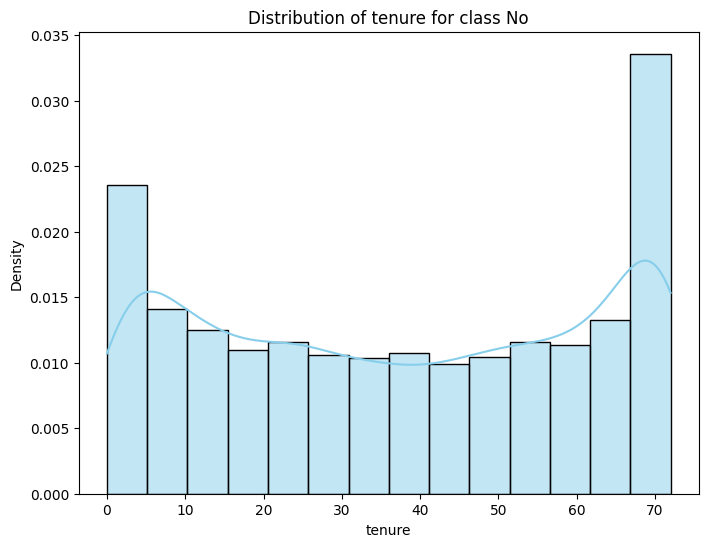

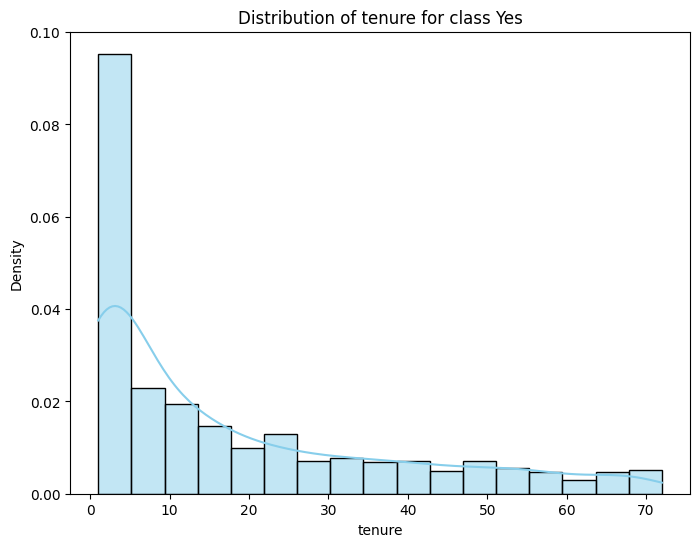

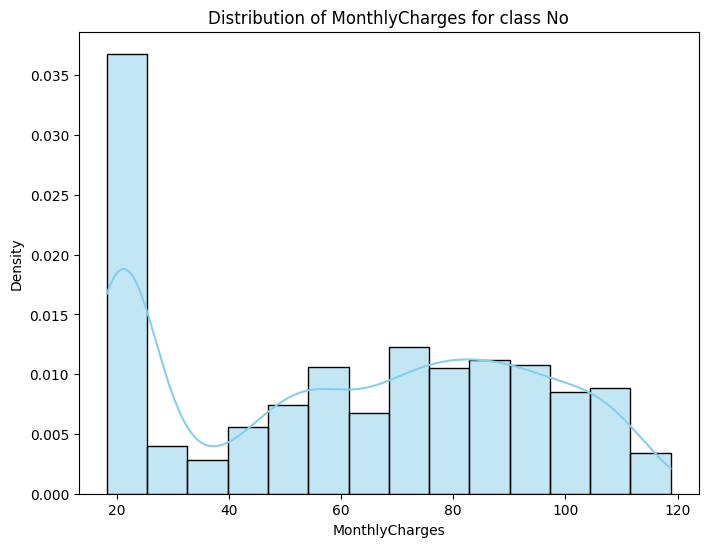

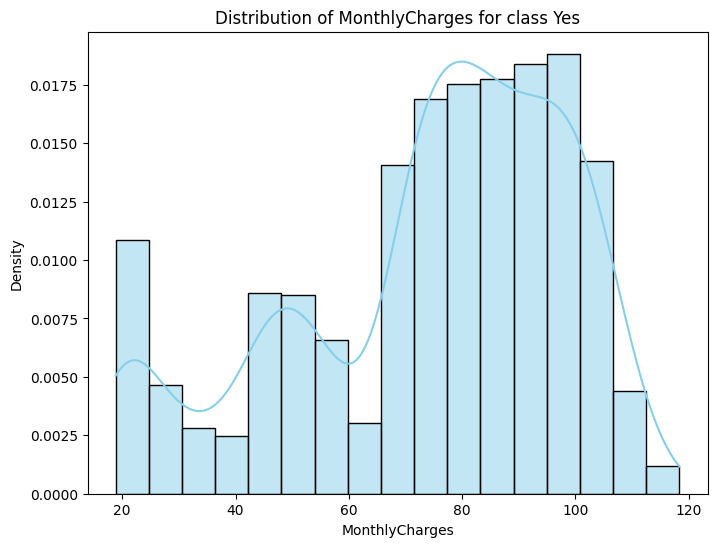

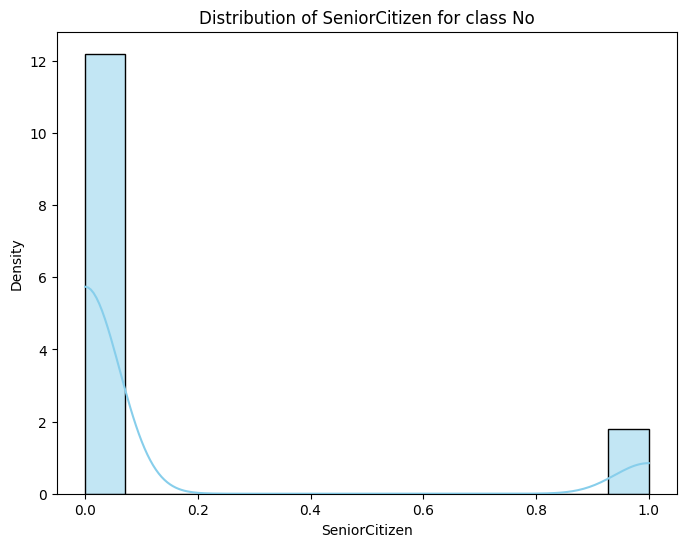

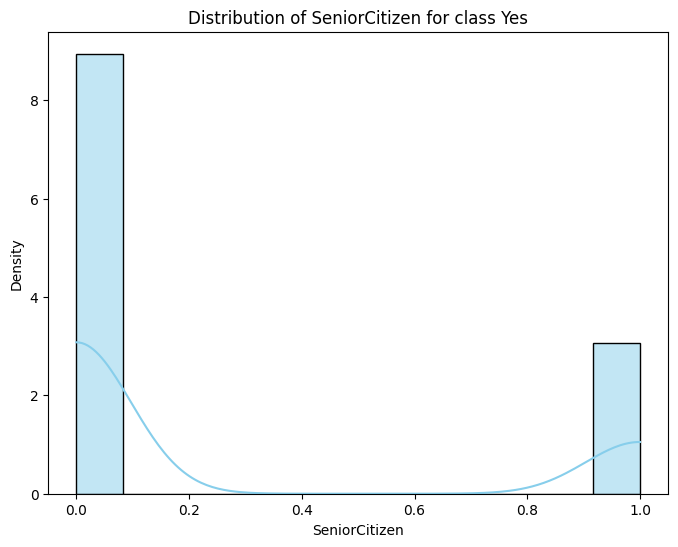

In [79]:
# Uji normalitas data kontinu dengan melakukan plotting setiap kelas yang ada
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def plot_distribusi(dataframe, column_list, class_column):
    # Loop through each column
    for column in column_list:
        # Get unique classes in the class_column
        classes = dataframe[class_column].unique()
        # Plot each class separately
        for cls in classes:
            # Select data for the current class
            class_data = dataframe[dataframe[class_column] == cls][column]
            # Create a subplot
            plt.figure(figsize=(8, 6))
            # Plot histogram
            sns.histplot(class_data, kde=True, stat='density', color='skyblue')
            plt.title(f'Distribution of {column} for class {cls}')
            plt.xlabel(column)
            plt.ylabel('Density')
            # Show plot
            plt.show()

plot_distribusi(df, ['tenure','MonthlyCharges', 'SeniorCitizen'], 'Churn')

<Axes: xlabel='Churn', ylabel='count'>

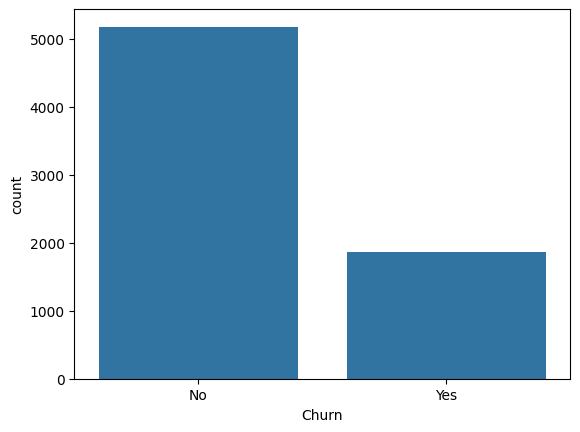

In [80]:
# Cek distribusi target kelas

sns.countplot(x='Churn',data=df)

# Imbalance Handling

Jika dirasa perlu, lakukan imbalance handling menggunakan metode Oversampling, Undersampling, SMOTE, ataupun metode lainnya untuk meratakan distribusi target kelas



In [81]:
from imblearn.over_sampling import SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Konversi kolom "TotalCharges" menjadi tipe numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Isi nilai-nilai yang hilang dengan nilai rata-rata
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Definisikan kolom kategorikal
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Lakukan one-hot encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Pisahkan fitur dan target
X_imputed = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Dapatkan indeks kolom kategorikal setelah encoding
categorical_features_indices = [i for i, col in enumerate(X_imputed.columns) if any(feat in col for feat in categorical_features)]

# Oversampling dengan SMOTENC
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=101)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_imputed, y)
df_resampled = pd.concat([X_resampled_smote, y_resampled_smote], axis=1)

# Pemrosesan Awal Data Kontinu

## Standard Scaling

In [82]:
def standarisasi(df):
  for col in['tenure','MonthlyCharges','TotalCharges']:
      mean = df[col].mean()
      std = df[col].std()
      df[col] = (df[col] - mean) / std
  return df
std_df = standarisasi(df)

## Normalization

In [83]:
def normalisasi(df):
  for col in ['tenure','MonthlyCharges','TotalCharges']:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)
  return df

norm_df = normalisasi(df)

# Modeling

Pemodelan dilakukan dengan penggabungan konsep Gaussian Naive Bayes dengan Multinomial Naive Bayes. Tidak diperbolehkan untuk melakukan rekayasa fitur dengan binning.

## Splitting Dataset

In [84]:
from sklearn.model_selection import train_test_split

data_latih, data_uji = train_test_split(df_resampled, test_size=0.3, random_state=101)

norm_data_latih, norm_data_uji = data_latih.copy(), data_uji.copy()
norm_label_uji = norm_data_uji.pop('Churn')

std_data_latih, std_data_uji = data_latih.copy(), data_uji.copy()
std_label_uji = std_data_uji.pop('Churn')

In [85]:
norm_label_uji.head()

800      No
4215     No
41       No
5461     No
9375    Yes
Name: Churn, dtype: object

In [86]:
std_label_uji.head()

800      No
4215     No
41       No
5461     No
9375    Yes
Name: Churn, dtype: object

## Perhitungan Prior

In [87]:
from collections import Counter
def hitung_prior(list_kelas):
  n_data = len(list_kelas)
  prior = Counter(list_kelas)
  for key in prior.keys():
    prior[key]=prior[key]/n_data
  return prior

## Menghitungan likelihood gaussian dan multinomial

In [88]:
def hitung_mean_std_kelas(input_data):
  data_per_kelas = input_data.groupby('Churn')
  mean_per_kelas = data_per_kelas.mean()
  std_per_kelas = data_per_kelas.std()
  return mean_per_kelas, std_per_kelas

def likelihood_gaussian(input_data):
  mean_per_kelas, std_per_kelas = hitung_mean_std_kelas(input_data)
  likelihood = {}
  for kelas in input_data['Churn'].unique():
    likelihood[kelas] = {}
    for kolom in ['tenure','MonthlyCharges','TotalCharges']:
      mean = mean_per_kelas.loc[kelas,kolom]
      std = std_per_kelas.loc[kelas,kolom]
      likelihood[kelas][kolom] = {'mean': mean, 'std':std}
  return likelihood

def likelihood_multinomial(input_data):
  jumlah_per_kelas = input_data.groupby('Churn').sum()
  likelihood = jumlah_per_kelas.div(jumlah_per_kelas.sum(axis=1),axis=0)
  return likelihood

## Training Naive Bayes

In [89]:
def training_naive_bayes(data_latih):
  prior = hitung_prior(data_latih['Churn'])
  likelihood_kontinu = likelihood_gaussian(data_latih)
  likelihood_kategori = likelihood_multinomial(data_latih)
  model = {'prior': prior, 'likelihood_kontinu': likelihood_kontinu,'likelihood_kategori':likelihood_kategori}
  return model

## Testing Naive Bayes

In [90]:
def testing_naive_bayes(model, data_uji):
  prior = model['prior']
  likelihood_kontinu = model['likelihood_kontinu']
  likelihood_kategori = model['likelihood_kategori']

  hasil_prediksi = {}
  for kelas in prior.keys():
    hasil_prediksi[kelas] = 1
    for kolom in ['tenure','MonthlyCharges','TotalCharges']:
      mean = likelihood_kontinu[kelas][kolom]['mean']
      std = likelihood_kontinu[kelas][kolom]['std']
      hasil_prediksi[kelas] *= (1/(std * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((data_uji[kolom] - mean)/std)**2)
    for kolom in likelihood_kategori.columns:
      if kolom != 'Churn':
        hasil_prediksi[kelas] *= likelihood_kategori.loc[kelas,kolom] ** data_uji[kolom]
    hasil_prediksi[kelas] *= prior[kelas]

  prediksi_akhir = max(hasil_prediksi, key=hasil_prediksi.get)
  return prediksi_akhir

# Analisis Klasifikasi

## Dataset Standarisasi

### Training Naive Bayes

In [91]:
model_std = training_naive_bayes(std_data_latih)

### Evaluasi Prediksi

In [92]:
prediksi_total_std =[]
for indeks in range(std_data_uji.shape[0]):
  prediksi_total_std.append(testing_naive_bayes(model_std,std_data_uji.iloc[indeks]))
print("Total prediksi benar: ",sum(prediksi_total_std==std_label_uji))

Total prediksi benar:  2185


## Dataset Normalisasi

### Training Naive Bayes

In [93]:
model_norm = training_naive_bayes(norm_data_latih)

### Evaluasi Prediksi

In [94]:
prediksi_total_norm =[]
for indeks in range(norm_data_uji.shape[0]):
  prediksi_total_norm.append(testing_naive_bayes(model_norm, norm_data_uji.iloc[indeks]))
print("Total prediksi benar: ",sum(prediksi_total_norm==norm_label_uji))

Total prediksi benar:  2185


# Kesimpulan

Soal

1. Apakah data kontinu dalam dataset menunjukkan kecenderungan distribusi normal?

2. Jika anda melakukan imbalance handling, mengapa hal tersebut perlu dilakukan?

3. Dalam hasil percobaan diatas, apakah efek dari standarisasi/normalisasi yang dilakukan terhadap data?

4. Dalam kasus yang diberikan, apakah model hybrid multinomial dan gaussian sudah optimal? Pengembangan apa saja yang dapat dilakukan?

Jawaban

1. Untuk menilai apakah data kontinu dalam dataset mengikuti distribusi normal, kita memanfaatkan plot histogram. Jika terdapat kesenjangan yang signifikan antara titik data, dapat disimpulkan bahwa distribusi tersebut tidak bersifat normal.

2. Penanganan ketidakseimbangan dilakukan untuk mengatasi ketidakseimbangan kelas dalam dataset yang dapat menyebabkan bias pada model machine learning terhadap kelas mayoritas. Salah satu metode yang digunakan dalam kasus ini adalah SMOTE.

3. Standarisasi mengubah fitur non-numerik menjadi numerik, sedangkan normalisasi mengubah rentang nilai pada fitur numerik sehingga jarak antar data menjadi lebih seragam.

4. Model hibrida multinomial dan gaussian sudah optimal, namun masih dapat ditingkatkan dengan menambah data latih dan menggabungkan beberapa model untuk meningkatkan performa.